Name: Tsai, Yu-Yun

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1. Supervised, Semi-Supervised, and Unsupervised Learning
(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
df1 = pd.read_csv('../data/wdbc.data', header=None)
df1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
cells=['Radius','Texture','Perimeter','Area','Smoothness','Compactness','Concavity',
              'Concave points','Symmetry','Fractal dimension']
features=['Mean','Se','Worst']
#create a dictionary
col={}

#create lists for features
for i in features:
    for j in cells:
        col[j+'_'+str(i)]=[]

In [4]:
col = list(col)
col_names = ['ID', 'Class']+col
df1.columns = col_names
df1

,ID,Class,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave points_Worst,Symmetry_Worst,Fractal dimension_Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


b) Monte-Carlo Simulation: Repeat the following procedures for supervised, un-supervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [5]:
df2 = df1.replace(to_replace = ['B','M'],value = ['1','0'])
df2

,ID,Class,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave points_Worst,Symmetry_Worst,Fractal dimension_Worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
import random

i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [7]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import statistics
import numpy

In [8]:
# scaler = StandardScaler()
# X_train_scale=scaler.fit_transform(X_train)
# X_test_scale = scaler.fit_transform(X_test)

In [9]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [10]:
class_report = []
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []
AUC_train = []
AUC_test = []

for i in range(1,31,1):
    
    positive = df2[df2['Class']== '1']
    negative = df2[df2['Class']== '0']
    #test set
    test_pos = positive.sample(frac=0.2, random_state=i)
    test_neg = negative.sample(frac=0.2, random_state=i)
    test = pd.concat([test_pos, test_neg])
    #training set
    index_test = test.index
    train = df2.drop(index = index_test)
    
    #split training set and test set
    y_train = train['Class']
    X_train = train.drop(columns = ['ID', 'Class'], axis=1)

    y_test = test['Class']
    X_test = test.drop(columns = ['ID', 'Class'], axis=1)
    #scale data
    scaler = StandardScaler()
    X_train_scale=scaler.fit_transform(X_train)
    X_test_scale = scaler.fit_transform(X_test)

    linearsvc = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, random_state=0, tol=0.7)
    grid_l1 = GridSearchCV(linearsvc, param, cv = StratifiedKFold(n_splits=5))
    grid_l1.fit(X_train_scale, y_train)
    y_pred_train = grid_l1.predict(X_train_scale)
    y_pred_test = grid_l1.predict(X_test_scale)
    #accuracy score
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_test.append(accuracy_score(y_test, y_pred_test))
    #precision score
    precision_train.append(precision_score(y_train, y_pred_train, average='macro'))
    precision_test.append(precision_score(y_test, y_pred_test, average='macro'))
    #recall
    recall_train.append(recall_score(y_train, y_pred_train, average='macro'))
    recall_test.append(recall_score(y_test, y_pred_test, average='macro'))
    #f1_score
    f1_train.append(f1_score(y_train, y_pred_train, average='macro'))
    f1_test.append(f1_score(y_test, y_pred_test, average='macro'))
    #auc
    AUC_train.append(roc_auc_score(y_train, y_pred_train))
    AUC_test.append(roc_auc_score(y_test, y_pred_test))
print('average accuracy score for training set:', np.mean(accuracy_train))
print('average accuracy score for test set:', np.mean(accuracy_test))
print('\n')
print('average precision score for training set:', np.mean(precision_train))
print('average precision score for test set:', np.mean(precision_test))
print('\n')
print('average recall score for training set:', np.mean(recall_train))
print('average recall score for test set:', np.mean(recall_test))
print('\n')
print('average f1 score for training set:', np.mean(f1_train))
print('average f1 score for test set:', np.mean(f1_test))
print('\n')
print('average AUC score for training set:', np.mean(AUC_train))
print('average AUC score for test set:', np.mean(AUC_test))

average accuracy score for training set: 0.9824561403508771
average accuracy score for test set: 0.9752212389380532


average precision score for training set: 0.9834424275183854
average precision score for test set: 0.9774725020225727


average recall score for training set: 0.979055258467023
average recall score for test set: 0.9699083389224235


average f1 score for training set: 0.9811557283451252
average f1 score for test set: 0.9732345911633037


average AUC score for training set: 0.979055258467023
average AUC score for test set: 0.9699083389224232


In [11]:
y_pred_train = y_pred_train.astype('int')
y_train = y_train.astype('int')

y_pred_test = y_pred_test.astype('int')
y_test = y_test.astype('int')

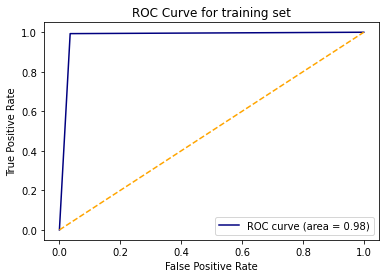

In [12]:
#roc curve for training set

fpr,tpr,_ = roc_curve(np.array(y_train), y_pred_train)
plt.figure()
plt.plot(fpr, tpr, color = 'navy', label ='ROC curve (area = %0.2f)' % 
         roc_auc_score(y_true = y_train, y_score = y_pred_train))
plt.plot([0, 1], [0, 1], color = "orange", linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training set')
plt.legend(loc="lower right")
plt.show()

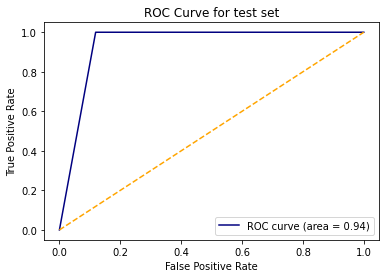

In [13]:
#roc curve for test set

fpr,tpr,_ = roc_curve(np.array(y_test), y_pred_test)
plt.figure()
plt.plot(fpr, tpr, color = 'navy', label ='ROC curve (area = %0.2f)' % 
         roc_auc_score(y_true = y_test, y_score = y_pred_test))
plt.plot([0, 1], [0, 1], color = "orange", linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend(loc="lower right")
plt.show()

In [14]:
#confusion matrix
confusion_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
confusion_train = confusion_train.rename_axis(index = 'true', columns = 'predicted')
print('confusion matrix for train set:')
confusion_train

confusion matrix for train set:


predicted,0,1
true,,
0,164,6
1,2,284


In [15]:
#confusion matrix
confusion_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
confusion_test = confusion_test.rename_axis(index = 'true', columns = 'predicted')
print('confusion matrix for test set:')
confusion_test

confusion matrix for test set:


predicted,0,1
true,,
0,37,5
1,0,71



ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.


A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [16]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [17]:
accuracy_labeled = []
accuracy_unlabeled = []
precision_labeled = []
precision_unlabeled = []
recall_labeled = []
recall_unlabeled =[]
f1_labeled = []
f1_unlabeled = []
AUC_labeled = []
AUC_unlabeled = []

for i in range(1,31,1):
    
    positive = df2[df2['Class']== '1']
    negative = df2[df2['Class']== '0']
    #test set
    test_pos = positive.sample(frac=0.2, random_state=0)
    test_neg = negative.sample(frac=0.2, random_state=0)
    test = pd.concat([test_pos, test_neg])
    #training set
    index_test = test.index
    train = df2.drop(index = index_test)
    
    #labeled(training set)
    train_pos_labeled = train[train['Class'] == '1'].sample(frac=0.5, random_state=i)
    train_neg_labeled = train[train['Class'] == '0'].sample(frac=0.5, random_state=i)
    labeled = pd.concat([train_pos_labeled, train_neg_labeled])
    #unlabeled(test set)
    index_labeled = labeled.index
    unlabeled = df2.drop(index = index_labeled)
    #split X and y for labeled data
    y_labeled = labeled['Class']
    X_labeled = labeled.drop(['ID','Class'],axis=1)
    #split X and y for unlabeled data
    y_unlabeled = unlabeled['Class']
    X_unlabeled = unlabeled.drop(['ID','Class'],axis=1)
    #scale data
    scaler = StandardScaler()
    X_labeled_scale=scaler.fit_transform(X_labeled)
    X_unlabeled_scale = scaler.fit_transform(X_unlabeled)
    
    param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    #svc
    linearsvc = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, random_state=0, tol=0.7)
    grid_ii = GridSearchCV(linearsvc, param, cv = StratifiedKFold(n_splits=5))
    grid_ii.fit(X_labeled_scale, y_labeled)
    y_pred_labeled = grid_ii.predict(X_labeled_scale)
    y_pred_unlabeled = grid_ii.predict(X_unlabeled_scale)
    
    #accuracy score
    accuracy_labeled.append(accuracy_score(y_labeled, y_pred_labeled))
    accuracy_unlabeled.append(accuracy_score(y_unlabeled, y_pred_unlabeled))
    #precision score
    precision_labeled.append(precision_score(y_labeled, y_pred_labeled, average='macro'))
    precision_unlabeled.append(precision_score(y_unlabeled, y_pred_unlabeled, average='macro'))
    #recall
    recall_labeled.append(recall_score(y_labeled, y_pred_labeled, average='macro'))
    recall_unlabeled.append(recall_score(y_unlabeled, y_pred_unlabeled, average='macro'))
    #f1_score
    f1_labeled.append(f1_score(y_labeled, y_pred_labeled, average='macro'))
    f1_unlabeled.append(f1_score(y_unlabeled, y_pred_unlabeled, average='macro'))
    #auc
    AUC_labeled.append(roc_auc_score(y_labeled, y_pred_labeled))
    AUC_unlabeled.append(roc_auc_score(y_unlabeled, y_pred_unlabeled))
    
print('average accuracy score for labeled data:', np.mean(accuracy_labeled))
print('average accuracy score for unlabeled data:', np.mean(accuracy_unlabeled))
print('\n')
print('average precision score for labeled data:', np.mean(precision_labeled))
print('average precision score for unlabeled data:', np.mean(precision_unlabeled))
print('\n')
print('average recall score for labeled data:', np.mean(recall_labeled))
print('average recall score for unlabeled data:', np.mean(recall_unlabeled))
print('\n')
print('average f1 score for labeled data:', np.mean(f1_labeled))
print('average f1 score for unlabeled data:', np.mean(f1_unlabeled))
print('\n')
print('average AUC score for labeled data:', np.mean(AUC_labeled))
print('average AUC score for unlabeled data:', np.mean(AUC_unlabeled))

average accuracy score for labeled data: 0.9808479532163741
average accuracy score for unlabeled data: 0.9732160312805475


average precision score for labeled data: 0.9818649666345944
average precision score for unlabeled data: 0.9737792320230583


average recall score for labeled data: 0.9772562731386258
average recall score for unlabeled data: 0.9690037285058994


average f1 score for labeled data: 0.9794085054134639
average f1 score for unlabeled data: 0.9711977489201954


average AUC score for labeled data: 0.9772562731386258
average AUC score for unlabeled data: 0.9690037285058994


In [18]:
y_pred_labeled = y_pred_labeled.astype('int')
y_labeled = y_labeled.astype('int')

y_pred_unlabeled = y_pred_unlabeled.astype('int')
y_unlabeled = y_unlabeled.astype('int')

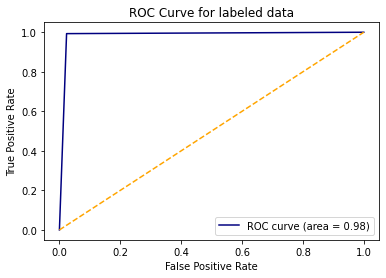

In [19]:
#roc curve for labeled data

fpr,tpr,_ = roc_curve(np.array(y_labeled), y_pred_labeled)
plt.figure()
plt.plot(fpr, tpr, color = 'navy', label ='ROC curve (area = %0.2f)' % 
         roc_auc_score(y_true = y_labeled, y_score = y_pred_labeled))
plt.plot([0, 1], [0, 1], color = "orange", linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for labeled data')
plt.legend(loc = "lower right")
plt.show()

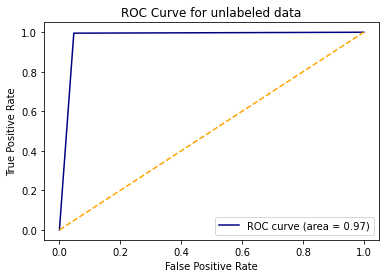

In [20]:
#roc curve for unlabeled data

fpr,tpr,_ = roc_curve(np.array(y_unlabeled), y_pred_unlabeled)
plt.figure()
plt.plot(fpr, tpr, color = 'navy', label ='ROC curve (area = %0.2f)' % 
         roc_auc_score(y_true = y_unlabeled, y_score = y_pred_unlabeled))
plt.plot([0, 1], [0, 1], color = "orange", linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for unlabeled data')
plt.legend(loc = "lower right")
plt.show()

In [21]:
#confusion matrix
confusion_labeled = pd.DataFrame(confusion_matrix(y_labeled, y_pred_labeled))
confusion_labeled = confusion_labeled.rename_axis(index = 'true', columns = 'predicted')
print('confusion matrix for labeled data:')
confusion_labeled

confusion matrix for labeled data:


predicted,0,1
true,,
0,83,2
1,1,142


In [22]:
#confusion matrix
confusion_unlabeled = pd.DataFrame(confusion_matrix(y_unlabeled, y_pred_unlabeled))
confusion_unlabeled = confusion_unlabeled.rename_axis(index = 'true', columns = 'predicted')
print('confusion matrix for unlabeled datad:')
confusion_unlabeled

confusion matrix for unlabeled datad:


predicted,0,1
true,,
0,121,6
1,1,213


B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [23]:
accuracy_labeled_B = []
accuracy_unlabeled_B = []
precision_labeled_B = []
precision_unlabeled_B = []
recall_labeled_B = []
recall_unlabeled_B =[]
f1_labeled_B = []
f1_unlabeled_B = []
AUC_labeled_B = []
AUC_unlabeled_B = []

for i in range(1,31,1):
    
    positive = df2[df2['Class']== '1']
    negative = df2[df2['Class']== '0']
    #test set
    test_pos = positive.sample(frac=0.2, random_state=0)
    test_neg = negative.sample(frac=0.2, random_state=0)
    test = pd.concat([test_pos, test_neg])
    #training set
    index_test = test.index
    train = df2.drop(index = index_test)
    #split X and y
    y_train_iiB = train['Class']
    X_train_iiB = train.drop(['ID','Class'], axis=1)
    y_test_iiB = test['Class']
    X_test_iiB = test.drop(['ID','Class'], axis=1)
    
    #labeled
    train_pos_labeled = train[train['Class'] == '1'].sample(frac=0.5, random_state=i)
    train_neg_labeled = train[train['Class'] == '0'].sample(frac=0.5, random_state=i)
    labeled = pd.concat([train_pos_labeled, train_neg_labeled])
    #unlabeled
    index_labeled = labeled.index
    unlabeled = train.drop(index = index_labeled)
    #split X and y for labeled data
    y_labeled = labeled['Class']
    X_labeled = labeled.drop(['ID','Class'],axis=1)
    #split X and y for unlabeled data
    y_unlabeled = unlabeled['Class']
    X_unlabeled = unlabeled.drop(['ID','Class'],axis=1)
    #scale data
    scaler = StandardScaler()
    X_labeled_scale = scaler.fit_transform(X_labeled)
    X_unlabeled_scale = scaler.fit_transform(X_unlabeled)
    X_train_iiB_scale = scaler.fit_transform(X_train_iiB)
    X_test_iiB_scale = scaler.fit_transform(X_test_iiB)
    

    for j in range(len(unlabeled)):
        param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
        #svc
        linearsvc = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, random_state=0, tol=0.7)
        grid_iiB = GridSearchCV(linearsvc, param, cv = StratifiedKFold(n_splits=5))
        grid_iiB.fit(X_labeled_scale, y_labeled.ravel())
        #get distance to the decision boundary of the SVM
        farthest = np.argmax(grid_iiB.decision_function(X_unlabeled_scale))
        index_farthest = pd.DataFrame(X_unlabeled_scale[farthest]).T
        #add it to the labeled data
        X_labeled_scale = np.concatenate((X_unlabeled_scale[farthest].reshape(1,-1),X_labeled_scale))
        y_labeled = np.concatenate((grid_iiB.predict(index_farthest),y_labeled))
        X_unlabeled_scale = np.delete(X_unlabeled_scale, farthest,axis=0)
        #predict
        y_pred_train_iiB = grid_iiB.predict(X_train_iiB_scale)
        y_pred_test_iiB = grid_iiB.predict(X_test_iiB_scale)
        #accuracy score
    accuracy_labeled_B.append(accuracy_score(y_train_iiB, y_pred_train_iiB))
    accuracy_unlabeled_B.append(accuracy_score(y_test_iiB, y_pred_test_iiB))
    #precision score
    precision_labeled_B.append(precision_score(y_train_iiB, y_pred_train_iiB, average='macro'))
    precision_unlabeled_B.append(precision_score(y_test_iiB, y_pred_test_iiB, average='macro'))
    #recall
    recall_labeled_B.append(recall_score(y_train_iiB, y_pred_train_iiB, average='macro'))
    recall_unlabeled_B.append(recall_score(y_test_iiB, y_pred_test_iiB, average='macro'))
    #f1_score
    f1_labeled_B.append(f1_score(y_train_iiB, y_pred_train_iiB, average='macro'))
    f1_unlabeled_B.append(f1_score(y_test_iiB, y_pred_test_iiB, average='macro'))
    #auc
    AUC_labeled_B.append(roc_auc_score(y_train_iiB, y_pred_train_iiB))
    AUC_unlabeled_B.append(roc_auc_score(y_test_iiB, y_pred_test_iiB))
print('average accuracy score for labeled data:', np.mean(accuracy_labeled_B))
print('average accuracy score for unlabeled data:', np.mean(accuracy_unlabeled_B))
print('\n')
print('average precision score for labeled data:', np.mean(precision_labeled_B))
print('average precision score for unlabeled data:', np.mean(precision_unlabeled_B))
print('\n')
print('average recall score for labeled data:', np.mean(recall_labeled_B))
print('average recall score for unlabeled data:', np.mean(recall_unlabeled_B))
print('\n')
print('average f1 score for labeled data:', np.mean(f1_labeled_B))
print('average f1 score for unlabeled data:', np.mean(f1_unlabeled_B))
print('\n')
print('average AUC score for labeled data:', np.mean(AUC_labeled_B))
print('average AUC score for unlabeled data:', np.mean(AUC_unlabeled_B))
    
         
         

average accuracy score for labeled data: 0.9687865497076021
average accuracy score for unlabeled data: 0.9867256637168145


average precision score for labeled data: 0.9734134656982426
average precision score for unlabeled data: 0.9890612553776764


average recall score for labeled data: 0.9604435760318112
average recall score for unlabeled data: 0.9827911915940084


average f1 score for labeled data: 0.9661220645780823
average f1 score for unlabeled data: 0.9856330109226223


average AUC score for labeled data: 0.9604435760318112
average AUC score for unlabeled data: 0.9827911915940084


In [24]:
y_pred_train_iiB = y_pred_train_iiB.astype('int')
y_pred_test_iiB = y_pred_test_iiB.astype('int')
y_train_iiB = y_train_iiB.astype('int')
y_test_iiB = y_test_iiB.astype('int')

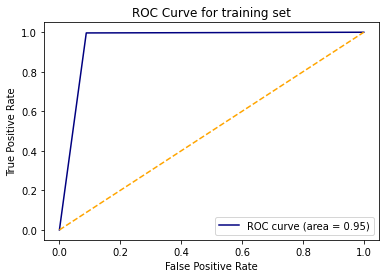

In [25]:
#roc curve for training set

fpr,tpr,_ = roc_curve(np.array(y_train_iiB), y_pred_train_iiB)
plt.figure()
plt.plot(fpr, tpr, color = 'navy', label ='ROC curve (area = %0.2f)' % 
         roc_auc_score(y_true = y_train_iiB, y_score = y_pred_train_iiB))
plt.plot([0, 1], [0, 1], color = "orange", linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training set')
plt.legend(loc = "lower right")
plt.show()

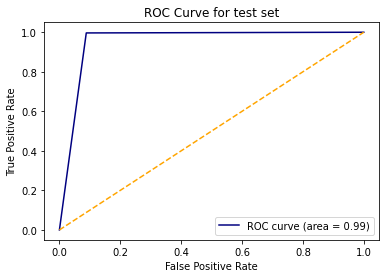

In [26]:
#roc curve for test set

fpr,tpr,_ = roc_curve(np.array(y_train_iiB), y_pred_train_iiB)
plt.figure()
plt.plot(fpr, tpr, color = 'navy', label ='ROC curve (area = %0.2f)' % 
         roc_auc_score(y_true = y_test_iiB, y_score = y_pred_test_iiB))
plt.plot([0, 1], [0, 1], color = "orange", linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend(loc = "lower right")
plt.show()

In [27]:
#confusion matrix
confusion_training_iiB = pd.DataFrame(confusion_matrix(y_train_iiB, y_pred_train_iiB))
confusion_training_iiB = confusion_training_iiB.rename_axis(index = 'true', columns = 'predicted')
print('confusion matrix for training set:')
confusion_training_iiB

confusion matrix for training set:


predicted,0,1
true,,
0,155,15
1,1,285


In [28]:
#confusion matrix
confusion_test_iiB = pd.DataFrame(confusion_matrix(y_test_iiB, y_pred_test_iiB))
confusion_test_iiB = confusion_test_iiB.rename_axis(index = 'true', columns = 'predicted')
print('confusion matrix for test set:')
confusion_test_iiB

confusion matrix for test set:


predicted,0,1
true,,
0,41,1
1,0,71


iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1

C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

In [29]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import statistics

In [30]:
df2_iii = train.copy()
df2_iii = df2_iii.drop(columns = ['ID','Class'])
df2_iii

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave points_Mean,Symmetry_Mean,Fractal dimension_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave points_Worst,Symmetry_Worst,Fractal dimension_Worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [31]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
561    1
562    0
564    0
565    0
566    0
Name: Class, Length: 456, dtype: int64

In [33]:
accuracy_train_kmeans = []
accuracy_test_kmeans = []
precision_train_kmeans = []
precision_test_kmeans = []
recall_train_kmeans = []
recall_test_kmeans = []
f1_train_kmeans = []
f1_test_kmeans = []
AUC_train_kmeans = []
AUC_test_kmeans = []


for i in range(0,30,1):
        klabels=[]
        positive = df2[df2['Class']== '1']
        negative = df2[df2['Class']== '0']
        #test set
        test_pos = positive.sample(frac=0.2, random_state=i)
        test_neg = negative.sample(frac=0.2, random_state=i)
        test = pd.concat([test_pos, test_neg])
        #training set
        index_test = test.index
        train = df2.drop(index = index_test)

        #split training set and test set
        y_train = train['Class']
        X_train = train.drop(columns = ['ID', 'Class'], axis=1)

        y_test = test['Class']
        X_test = test.drop(columns = ['ID', 'Class'], axis=1)
        #scale data
        scaler = StandardScaler()
        X_train_scale=scaler.fit_transform(X_train)
        X_test_scale = scaler.fit_transform(X_test)

        
        kmeans = KMeans(init = 'random', n_clusters = 2, random_state = i, tol=0.7)
        kmeans.fit(X_train_scale)
        klabels.append(kmeans.labels_)
        df2_iii['cluster'] = kmeans.labels_
        cluster_0 = df2_iii[df2_iii['cluster']==0]
        cluster_1 = df2_iii[df2_iii['cluster']==1]
        #cluster centers
        centers = kmeans.cluster_centers_
        #find the closest 30 data points to each center
        neighbors = NearestNeighbors(n_neighbors=30)
        neighbors.fit(X_train.values)
        distances, indices = neighbors.kneighbors(centers)
        #majority poll
        indeces0 = y_train.iloc[indices[0]]
        count0 = statistics.mode(indeces0)
        indices1 = y_train.iloc[indices[1]]
        count1 = statistics.mode(indices1)
        cluster_0['cluster_pred'] = count0
        cluster_1['cluster_pred'] = count1
        df2_iii_new = pd.concat([cluster_0,cluster_1], axis=0)
        y_pred_kmeans = df2_iii_new['cluster_pred']
        y_pred_test_kmeans = kmeans.predict(X_test_scale)
        #accuracy score
        accuracy_train_kmeans.append(accuracy_score(y_train.astype('int'), y_pred_kmeans.astype('int')))
        accuracy_test_kmeans.append(accuracy_score(y_test.astype('int'), y_pred_test_kmeans.astype('int')))
        #precision score
        precision_train_kmeans.append(precision_score(y_train.astype('int'), y_pred_kmeans.astype('int'), average='macro'))
        precision_test_kmeans.append(precision_score(y_test.astype('int'), y_pred_test_kmeans.astype('int'), average='macro'))
        #recall
        recall_train_kmeans.append(recall_score(y_train.astype('int'), y_pred_kmeans.astype('int'), average='macro'))
        recall_test_kmeans.append(recall_score(y_test.astype('int'), y_pred_test_kmeans.astype('int'), average='macro'))
        #f1_score
        f1_train_kmeans.append(f1_score(y_train.astype('int'), y_pred_kmeans.astype('int'), average='macro'))
        f1_test_kmeans.append(f1_score(y_test.astype('int'), y_pred_test_kmeans.astype('int'), average='macro'))
        #auc
        AUC_train_kmeans.append(roc_auc_score(y_train.astype('int'), y_pred_kmeans.astype('int')))
        AUC_test_kmeans.append(roc_auc_score(y_test.astype('int'), y_pred_test_kmeans.astype('int')))
print('average accuracy score for training set:', np.mean(accuracy_train_kmeans))
print('average accuracy score for test set:', np.mean(accuracy_test_kmeans))
print('\n')
print('average precision score for training set:', np.mean(precision_train_kmeans))
print('average precision score for test set:', np.mean(precision_test_kmeans))
print('\n')
print('average recall score for training set:', np.mean(recall_train_kmeans))
print('average recall score for test set:', np.mean(recall_test_kmeans))
print('\n')
print('average f1 score for training set:', np.mean(f1_train_kmeans))
print('average f1 score for test set:', np.mean(f1_test_kmeans))
print('\n')
print('average AUC score for training set:', np.mean(AUC_train_kmeans))
print('average AUC score for test set:', np.mean(AUC_test_kmeans))

/var/folders/00/2819n01s5hq_4kp5zlymwjpr0000gn/T/ipykernel_75319/1909234557.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0['cluster_pred'] = count0
/var/folders/00/2819n01s5hq_4kp5zlymwjpr0000gn/T/ipykernel_75319/1909234557.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['cluster_pred'] = count1
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

/var/folders/00/2819n01s5hq_4kp5zlymwjpr0000gn/T/ipykernel_75319/1909234557.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0['cluster_pred'] = count0
/var/folders/00/2819n01s5hq_4kp5zlymwjpr0000gn/T/ipykernel_75319/1909234557.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['cluster_pred'] = count1
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

average accuracy score for training set: 0.6271929824561403
average accuracy score for test set: 0.6917404129793512


average precision score for training set: 0.31359649122807015
average precision score for test set: 0.6940714954943747


average recall score for training set: 0.5
average recall score for test set: 0.6833780460541025


average f1 score for training set: 0.3854447439353098
average f1 score for test set: 0.6852812255126791


average AUC score for training set: 0.5
average AUC score for test set: 0.6833780460541025


/var/folders/00/2819n01s5hq_4kp5zlymwjpr0000gn/T/ipykernel_75319/1909234557.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0['cluster_pred'] = count0
/var/folders/00/2819n01s5hq_4kp5zlymwjpr0000gn/T/ipykernel_75319/1909234557.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['cluster_pred'] = count1
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

In [34]:
print('average accuracy score for training set:', np.mean(accuracy_train_kmeans))
print('average accuracy score for test set:', np.mean(accuracy_test_kmeans))
print('\n')
print('average precision score for training set:', np.mean(precision_train_kmeans))
print('average precision score for test set:', np.mean(precision_test_kmeans))
print('\n')
print('average recall score for training set:', np.mean(recall_train_kmeans))
print('average recall score for test set:', np.mean(recall_test_kmeans))
print('\n')
print('average f1 score for training set:', np.mean(f1_train_kmeans))
print('average f1 score for test set:', np.mean(f1_test_kmeans))
print('\n')
print('average AUC score for training set:', np.mean(AUC_train_kmeans))
print('average AUC score for test set:', np.mean(AUC_test_kmeans))

average accuracy score for training set: 0.6271929824561403
average accuracy score for test set: 0.6917404129793512


average precision score for training set: 0.31359649122807015
average precision score for test set: 0.6940714954943747


average recall score for training set: 0.5
average recall score for test set: 0.6833780460541025


average f1 score for training set: 0.3854447439353098
average f1 score for test set: 0.6852812255126791


average AUC score for training set: 0.5
average AUC score for test set: 0.6833780460541025


In [35]:
y_train.iloc[indices[0]].value_counts()

1    30
Name: Class, dtype: int64

In [36]:
count0 = y_train.iloc[indices[0]]
statistics.mode(count0)

'1'

In [37]:
y_train.iloc[indices[1]].value_counts()

1    30
Name: Class, dtype: int64

In [38]:
count1 = y_train.iloc[indices[1]]
statistics.mode(count1)

'1'

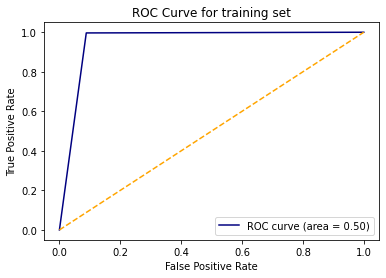

In [39]:
#roc curve for training set

fpr,tpr,_ = roc_curve(np.array(y_train_iiB), y_pred_train_iiB)
plt.figure()
plt.plot(fpr, tpr, color = 'navy', label ='ROC curve (area = %0.2f)' % 
         roc_auc_score(y_true = y_train, y_score = y_pred_kmeans))
plt.plot([0, 1], [0, 1], color = "orange", linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for training set')
plt.legend(loc = "lower right")
plt.show()

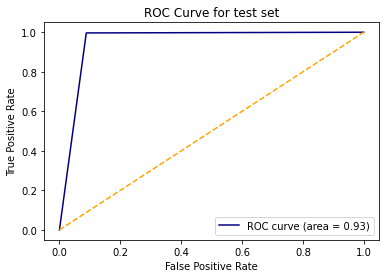

In [40]:
#roc curve for test set

fpr,tpr,_ = roc_curve(np.array(y_train_iiB), y_pred_train_iiB)
plt.figure()
plt.plot(fpr, tpr, color = 'navy', label ='ROC curve (area = %0.2f)' % 
         roc_auc_score(y_true = y_test, y_score = y_pred_test_kmeans))
plt.plot([0, 1], [0, 1], color = "orange", linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for test set')
plt.legend(loc = "lower right")
plt.show()

In [41]:
#confusion matrix
confusion_train_kmeans = pd.DataFrame(confusion_matrix(y_train, y_pred_kmeans))
confusion_train_kmeans = confusion_train_kmeans.rename_axis(index = 'true', columns = 'predicted')
print('confusion matrix for training set:')
confusion_train_kmeans

confusion matrix for training set:


predicted,0,1
true,,
0,0,170
1,0,286


In [42]:
#confusion matrix
confusion_test_kmeans = pd.DataFrame(confusion_matrix(y_test.astype('int'), y_pred_test_kmeans))
confusion_test_kmeans = confusion_test_kmeans.rename_axis(index = 'true', columns = 'predicted')
print('confusion matrix for training set:')
confusion_test_kmeans

confusion matrix for training set:


predicted,0,1
true,,
0,38,4
1,3,68



iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit - predict method.

In [43]:
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import MinMaxScaler

In [44]:
df2_iv = train.copy()
df2_iv = df2_iv.drop(columns = ['ID'])
df2_iv

,Class,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave points_Mean,Symmetry_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave points_Worst,Symmetry_Worst,Fractal dimension_Worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1,11.20,29.37,70.67,386.0,0.07449,0.03558,0.0000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.0000,0.1566,0.05905
562,0,15.22,30.62,103.40,716.9,0.10480,0.20870,0.2550,0.09429,0.2128,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.2356,0.4089,0.14090
563,0,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.3174,0.14740,0.2149,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [45]:
accuracy_train_spectral = []
precision_train_spectral = []
recall_train_spectral = []
f1_train_spectral = []
AUC_train_spectral = []

for i in range(0,30,1):
        spectral_labels=[]
        
        positive = df2[df2['Class']== '1']
        negative = df2[df2['Class']== '0']
        #test set
        test_pos = positive.sample(frac=0.2, random_state=i)
        test_neg = negative.sample(frac=0.2, random_state=i)
        test = pd.concat([test_pos, test_neg])
        #training set
        index_test = test.index
        train = df2.drop(index = index_test)
    
        #split training set and test set
        y_train = train['Class']
        X_train = train.drop(columns = ['ID', 'Class'], axis=1)

        y_test = test['Class']
        X_test = test.drop(columns = ['ID', 'Class'], axis=1)
        
        df2_iv = train.copy()
        df2_iv = df2_iv.drop(columns = ['ID'])
        #scale data
        scaler = MinMaxScaler()
        X_train_scale=scaler.fit_transform(X_train)
        X_test_scale = scaler.fit_transform(X_test)

        
        spectral = SpectralClustering(n_clusters=2, random_state=i, affinity='rbf', gamma=1, assign_labels='discretize')
        spectral.fit(X_train_scale)
        spectral_labels.append(spectral.labels_)
        df2_iv['cluster'] = spectral.labels_
        y_pred_spectral = spectral.fit_predict(X_train_scale)
        
        cluster_0 = df2_iv[df2_iv['cluster']==0]
        cluster_1 = df2_iv[df2_iv['cluster']==1]
        df_cluster = pd.concat([cluster_0,cluster_1])
        #groupby
        cluster_groupby = df_cluster.groupby(['cluster'])['Class'].agg(lambda x:x.value_counts().index[0])
        condition = [(df_cluster['cluster'] == 0), (df_cluster['cluster'] == 1)]
        condion_list = [int(df_cluster.groupby(['cluster'])['Class'].agg(lambda x:x.value_counts().index[0])[0]),
                        int(df_cluster.groupby(['cluster'])['Class'].agg(lambda x:x.value_counts().index[0])[1])]
        df_cluster['pred_class'] = np.select(condition, condion_list)   
        
        #accuracy score
        accuracy_train_spectral.append(accuracy_score(df_cluster['Class'].astype('int'), df_cluster['pred_class']))
        #precision score
        precision_train_spectral.append(precision_score(df_cluster['Class'].astype('int'), df_cluster['pred_class'], average='macro'))
        #recall
        recall_train_spectral.append(recall_score(df_cluster['Class'].astype('int'), df_cluster['pred_class'], average='macro'))
        #f1_score
        f1_train_spectral.append(f1_score(df_cluster['Class'].astype('int'), df_cluster['pred_class'], average='macro'))
        #auc
        AUC_train_spectral.append(roc_auc_score(df_cluster['Class'].astype('int'), df_cluster['pred_class']))
print('average accuracy score for spectral:', np.mean(accuracy_train_spectral))
print('average precision score for spectral:', np.mean(precision_train_spectral))
print('average recall score for spectral:', np.mean(recall_train_spectral))
print('average f1 score for spectral:', np.mean(f1_train_spectral))
print('average AUC score for spectral:', np.mean(AUC_train_spectral))

average accuracy score for spectral: 0.9162280701754388
average precision score for spectral: 0.9343602844830365
average recall score for spectral: 0.891066776360894
average f1 score for spectral: 0.9061437598084809
average AUC score for spectral: 0.891066776360894


v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.


In [46]:
print('Result for supervised learning:')
print('\n')
print('average accuracy score for training set:', np.mean(accuracy_train))
print('average accuracy score for test set:', np.mean(accuracy_test))
print('\n')
print('average precision score for training set:', np.mean(precision_train))
print('average precision score for test set:', np.mean(precision_test))
print('\n')
print('average recall score for training set:', np.mean(recall_train))
print('average recall score for test set:', np.mean(recall_test))
print('\n')
print('average f1 score for training set:', np.mean(f1_train))
print('average f1 score for test set:', np.mean(f1_test))
print('\n')
print('average AUC score for training set:', np.mean(AUC_train))
print('average AUC score for test set:', np.mean(AUC_test))

Result for supervised learning:


average accuracy score for training set: 0.9824561403508771
average accuracy score for test set: 0.9752212389380532


average precision score for training set: 0.9834424275183854
average precision score for test set: 0.9774725020225727


average recall score for training set: 0.979055258467023
average recall score for test set: 0.9699083389224235


average f1 score for training set: 0.9811557283451252
average f1 score for test set: 0.9732345911633037


average AUC score for training set: 0.979055258467023
average AUC score for test set: 0.9699083389224232


In [47]:
print('Result for semi-supervised learning:')
print('\n')
print('average accuracy score for labeled data:', np.mean(accuracy_labeled_B))
print('average accuracy score for unlabeled data:', np.mean(accuracy_unlabeled_B))
print('\n')
print('average precision score for labeled data:', np.mean(precision_labeled_B))
print('average precision score for unlabeled data:', np.mean(precision_unlabeled_B))
print('\n')
print('average recall score for labeled data:', np.mean(recall_labeled_B))
print('average recall score for unlabeled data:', np.mean(recall_unlabeled_B))
print('\n')
print('average f1 score for labeled data:', np.mean(f1_labeled_B))
print('average f1 score for unlabeled data:', np.mean(f1_unlabeled_B))
print('\n')
print('average AUC score for labeled data:', np.mean(AUC_labeled_B))
print('average AUC score for unlabeled data:', np.mean(AUC_unlabeled_B))

Result for semi-supervised learning:


average accuracy score for labeled data: 0.9687865497076021
average accuracy score for unlabeled data: 0.9867256637168145


average precision score for labeled data: 0.9734134656982426
average precision score for unlabeled data: 0.9890612553776764


average recall score for labeled data: 0.9604435760318112
average recall score for unlabeled data: 0.9827911915940084


average f1 score for labeled data: 0.9661220645780823
average f1 score for unlabeled data: 0.9856330109226223


average AUC score for labeled data: 0.9604435760318112
average AUC score for unlabeled data: 0.9827911915940084


In [48]:
print('Result for unsupervised learning:')
print('\n')
print('average accuracy score for training set:', np.mean(accuracy_train_kmeans))
print('average accuracy score for test set:', np.mean(accuracy_test_kmeans))
print('\n')
print('average precision score for training set:', np.mean(precision_train_kmeans))
print('average precision score for test set:', np.mean(precision_test_kmeans))
print('\n')
print('average recall score for training set:', np.mean(recall_train_kmeans))
print('average recall score for test set:', np.mean(recall_test_kmeans))
print('\n')
print('average f1 score for training set:', np.mean(f1_train_kmeans))
print('average f1 score for test set:', np.mean(f1_test_kmeans))
print('\n')
print('average AUC score for training set:', np.mean(AUC_train_kmeans))
print('average AUC score for test set:', np.mean(AUC_test_kmeans))

Result for unsupervised learning:


average accuracy score for training set: 0.6271929824561403
average accuracy score for test set: 0.6917404129793512


average precision score for training set: 0.31359649122807015
average precision score for test set: 0.6940714954943747


average recall score for training set: 0.5
average recall score for test set: 0.6833780460541025


average f1 score for training set: 0.3854447439353098
average f1 score for test set: 0.6852812255126791


average AUC score for training set: 0.5
average AUC score for test set: 0.6833780460541025


In [49]:
print('Result for spectral clustering:')
print('\n')
print('average accuracy score for spectral:', np.mean(accuracy_train_spectral))
print('average precision score for spectral:', np.mean(precision_train_spectral))
print('average recall score for spectral:', np.mean(recall_train_spectral))
print('average f1 score for spectral:', np.mean(f1_train_spectral))
print('average AUC score for spectral:', np.mean(AUC_train_spectral))

Result for spectral clustering:


average accuracy score for spectral: 0.9162280701754388
average precision score for spectral: 0.9343602844830365
average recall score for spectral: 0.891066776360894
average f1 score for spectral: 0.9061437598084809
average AUC score for spectral: 0.891066776360894


2. Active Learning Using Support Vector Machines
(a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [50]:
from random import sample

In [51]:
df_bank = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
df_bank.columns = ['Variance','Skewness','Curtosis','Entropy','Class']
df_bank

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [52]:
#Choose 472 data points randomly as the test set
testset = df_bank.sample(n=472)
index_testset = testset.index
trainset = df_bank.drop(index = index_testset)
testset

,Variance,Skewness,Curtosis,Entropy,Class
1285,0.29520,4.8856,-5.14900,-6.232300,1
1328,-1.39680,-9.6698,9.46520,-0.348720,1
1320,-0.72068,-6.7583,5.84080,0.623690,1
800,-2.06310,-1.5147,1.21900,0.445240,1
270,3.84170,10.0215,-4.26990,-4.915900,0
...,...,...,...,...,...
465,-2.69890,12.1984,0.67661,-8.548200,0
1159,-2.56500,-5.7899,6.01220,0.046968,1
14,3.40400,8.7261,-2.99150,-0.572420,0
620,3.46260,-4.4490,3.54270,0.154290,0


(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

i. Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.


In [53]:
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [55]:

avg_test_error_2i = []
X_train_2i_new = pd.DataFrame()
y_train_2i_new = pd.DataFrame()
dfavg_test_error = pd.DataFrame()
for i in range(0,50,1):
    
    test_error_2i = []
    
    #Choose 472 data points randomly as the test set
    testset = df_bank.sample(n=472).copy()
    index_testset = testset.index
    trainset = df_bank.drop(index = index_testset)
    y_test_2i = testset['Class']
    X_test_2i = testset.drop(columns= ['Class'])


    for j in range(90):
        if j <= 88:
            trainset_10 = trainset.sample(n=10)
            y_train_2i = trainset_10['Class']
            X_train_2i = trainset_10.drop(columns = ['Class'])
            X_train_2i_new = pd.concat([X_train_2i_new, X_train_2i])
            y_train_2i_new = pd.concat([y_train_2i_new, y_train_2i])
        if j == 89:
            trainset_10 = trainset
            y_train_2i = trainset_10['Class']
            X_train_2i = trainset_10.drop(columns = ['Class'])
            X_train_2i_new = pd.concat([X_train_2i_new, X_train_2i])
            y_train_2i_new = pd.concat([y_train_2i_new, y_train_2i])    
        #svc
        linearsvc = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, random_state=0, tol=0.7)
        grid_2i = GridSearchCV(linearsvc, param, cv = StratifiedKFold(n_splits=5))
        grid_2i.fit(X_train_2i_new, y_train_2i_new.values.ravel())
        trainset = trainset.drop(index = trainset_10.index)
        y_pred = grid_2i.predict(X_test_2i)
        test_error_2i.append((1 - accuracy_score(y_test_2i, y_pred)))
        avg_test_error_2i.append(statistics.mean(test_error_2i))
    dfavg_test_error['test error'+str(i)] = test_error_2i
                      

/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [56]:
dfavg_test_error2 = dfavg_test_error.mean(axis=1)
dfavg_test_error2

0     0.021356
1     0.017881
2     0.017415
3     0.017881
4     0.017712
        ...   
85    0.017076
86    0.016992
87    0.017119
88    0.017076
89    0.017203
Length: 90, dtype: float64

ii. Train a SVM with a pool of 10 randomly selected data points from the training set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [57]:
#Choose 472 data points randomly as the test set
testset_temp = df_bank.sample(n=472).copy()
index_testset = testset_temp.index
trainset_temp = df_bank.drop(index = index_testset)  
trainset_temp

,Variance,Skewness,Curtosis,Entropy,Class
1,4.5459,8.16740,-2.45860,-1.46210,0
11,3.9899,-2.70660,2.39460,0.86291,0
12,1.8993,7.66250,0.15394,-3.11080,0
13,-1.5768,10.84300,2.54620,-2.93620,0
14,3.4040,8.72610,-2.99150,-0.57242,0
...,...,...,...,...,...
1364,-2.8391,-6.63000,10.48490,-0.42113,1
1365,-4.5046,-5.81260,10.88670,-0.52846,1
1366,-2.4100,3.74330,-0.40215,-1.29530,1
1369,-3.7503,-13.45860,17.59320,-2.77710,1


In [58]:
testset = testset_temp.copy()
trainset = trainset_temp.copy()
print(testset.shape, trainset.shape)

(472, 5) (900, 5)


In [59]:

avg_test_error_2ii = []
X_train_2ii_new = pd.DataFrame()
y_train_2ii_new = pd.DataFrame()
dfavg_test_error_2ii = pd.DataFrame()

for i in range(0,50,1):
        X_train_2ii = pd.DataFrame()
        y_train_2ii = pd.DataFrame()
        test_error_2ii = []
        
        testset = testset_temp.copy()
        trainset = trainset_temp.copy()
        
        #10 randomly selected data points
        X_train, X_test, y_train, y_test = train_test_split(trainset.drop(columns=['Class']), trainset['Class'], train_size=(10/900), random_state=0, stratify=trainset['Class'])
        
        #svc
        linearsvc = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, random_state=0, tol=0.7)
        grid_2ii = GridSearchCV(linearsvc, param, cv = StratifiedKFold(n_splits=5))
        grid_2ii.fit(X_train, y_train.values.ravel())

        #predict
        y_pred = grid_2ii.predict(testset.drop(columns=['Class']))
        test_error_2ii.append((1 - accuracy_score(testset['Class'], y_pred)))
        avg_test_error_2ii.append(statistics.mean(test_error_2ii))
        
        for j in range(1,90):
            closest = abs(grid_2ii.decision_function(X_test))
            dist_sort = pd.DataFrame(closest).sort_values(0)
            dist_sort = dist_sort.iloc[:10,]
            
            X_train_2ii = pd.concat([X_train_2ii, X_test.iloc[dist_sort.index]])
            y_train_2ii = pd.concat([y_train_2ii, y_test.iloc[dist_sort.index]])
            
            if j < 90:
                X_test = X_test.drop(X_test.iloc[dist_sort.index].index)
                y_test = y_test.drop(y_test.iloc[dist_sort.index].index)
            
            #svc
            linearsvc = LinearSVC(penalty='l1',loss='squared_hinge', dual=False, random_state=0, tol=0.7)
            grid_2ii = GridSearchCV(linearsvc, param, cv = StratifiedKFold(n_splits=5))
            grid_2ii.fit(X_train_2ii, y_train_2ii.values.ravel())
           
            #predict
            y_pred = grid_2ii.predict(testset.drop(columns=['Class']))
            test_error_2ii.append((1 - accuracy_score(testset['Class'], y_pred)))
            avg_test_error_2ii.append(statistics.mean(test_error_2ii))
            
        dfavg_test_error_2ii['test error'+str(i)] = test_error_2ii           

/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than

/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than

/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Users/yuyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than

In [60]:
dfavg_test_error_2ii2 = dfavg_test_error_2ii.mean(axis=1)
dfavg_test_error_2ii2

0     0.146186
1     0.368644
2     0.031780
3     0.072034
4     0.023305
        ...   
85    0.019068
86    0.019068
87    0.019068
88    0.019068
89    0.019068
Length: 90, dtype: float64

In [61]:
dfavg_test_error_2ii

,test error0,test error1,test error2,test error3,test error4,test error5,test error6,test error7,test error8,test error9,...,test error40,test error41,test error42,test error43,test error44,test error45,test error46,test error47,test error48,test error49
0,0.146186,0.146186,0.146186,0.146186,0.146186,0.146186,0.146186,0.146186,0.146186,0.146186,...,0.146186,0.146186,0.146186,0.146186,0.146186,0.146186,0.146186,0.146186,0.146186,0.146186
1,0.368644,0.368644,0.368644,0.368644,0.368644,0.368644,0.368644,0.368644,0.368644,0.368644,...,0.368644,0.368644,0.368644,0.368644,0.368644,0.368644,0.368644,0.368644,0.368644,0.368644
2,0.031780,0.031780,0.031780,0.031780,0.031780,0.031780,0.031780,0.031780,0.031780,0.031780,...,0.031780,0.031780,0.031780,0.031780,0.031780,0.031780,0.031780,0.031780,0.031780,0.031780
3,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,...,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034,0.072034
4,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,...,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305,0.023305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,...,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068
86,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,...,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068
87,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,...,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068
88,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,...,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068,0.019068


(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

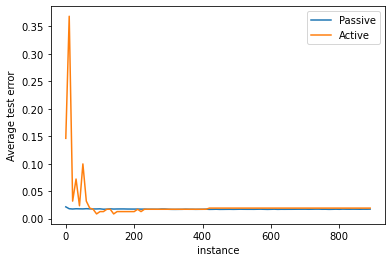

In [62]:
plt.figure()
plt.plot((dfavg_test_error.index)*10, dfavg_test_error2, label = 'Passive')
plt.plot((dfavg_test_error_2ii.index)*10, dfavg_test_error_2ii2, label = 'Active')
plt.xlabel('instance')
plt.ylabel('Average test error')
plt.legend()

Conclusion: Passive learning performs better than active learning.

References:

1. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
4. https://www.geeksforgeeks.org/python-pandas-dataframe-sample/
5. https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
8. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
9. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
10. https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
11. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
12. https://archive.ics.uci.edu/ml/datasets/banknote+authentication#
13. https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value
14. https://numpy.org/doc/stable/reference/generated/numpy.select.html
